# Ford Gobike result dataset 
## by Kihun Kim 

## Preliminary Wrangling : Motivation 


### I constructed 3 big parts of this data warangling
1. Bivariate Exploration of data :  Handling single variable for visualization
2. Univariate Exploration of data : Handling two variables for visualization
3. Multivariate Exploration of data : Handling more than 2 variables for visualization

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore") 


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [7]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [8]:
df.shape
#shape of df

(519700, 13)

In [9]:
sum(df.duplicated())
# NO duplication 

0

In [10]:
df.isna().sum()
# there are a few missing value.Those are all numeric values. 

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

### What is the structure of your dataset?

This dataset consists of 519700 rows and 13 columns

### What is/are the main feature(s) of interest in your dataset?

- user_type
- bike_id


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- start_time
- ent_time
- duration
- start_station_id
- end_station_id 



### Unnecessary featues in the dataset do you think (remove it before we start to visualized) ? 

- start_station_name
- end_station_name
- start_station_latitude
- start_station_longitude
- end_station_latitude 
- end_station_longitude



In [11]:
df = df.drop(columns=['start_station_name', 'end_station_name','start_station_latitude','start_station_longitude',
                'end_station_latitude','end_station_longitude'])

In [12]:
df['duration_sec'] = df['duration_sec']/60 
df=df.rename(columns={'duration_sec':'duration_min'})
df.head()
# Subscriber : regular customer,subscribed
# Customer : casual customer,unsubscribed 

,duration_min,start_time,end_time,start_station_id,end_station_id,bike_id,user_type
0,1335.166667,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96,Customer
1,1313.333333,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,96,88,Customer
2,762.800000,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,245,1094,Customer
3,1036.200000,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,5,2831,Customer
4,726.716667,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,247,3167,Subscriber


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

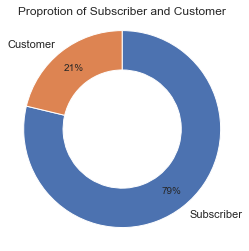

In [13]:
# Pie charts 
sorted_counts = df['user_type'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');
plt.title('Proprotion of Subscriber and Customer')
plt.axis('square');

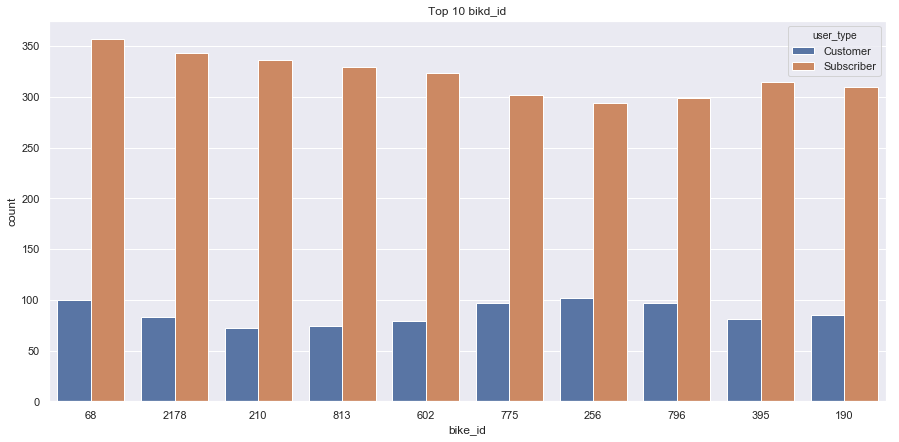

In [14]:
# countplot
plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='bike_id',hue='user_type',order=df.bike_id.value_counts().head(10).index)
plt.title('Top 10 bikd_id');

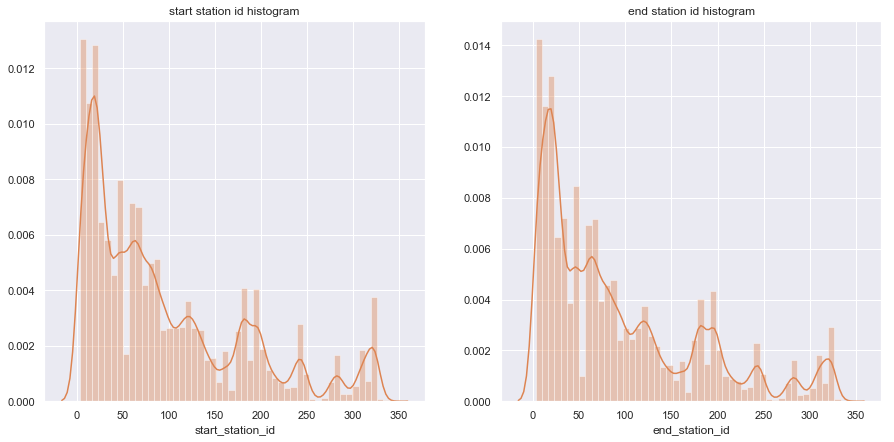

In [15]:
# distplot 
f,ax=plt.subplots(1,2,figsize=(15,7))
base_color = sns.color_palette()[1]
sns.distplot(df['start_station_id'],color=base_color,ax=ax[0])
ax[0].set_title('start station id histogram')
sns.distplot(df['end_station_id'],color=base_color,ax=ax[1])
ax[1].set_title('end station id histogram');


# both graph are very simliar station_id tendency.The higher the station id the lower demand of user

In [16]:
# lineplot 
df2 = df.copy()
#To keep original dataset use .copy()
df2['Hour'] = pd.to_datetime(df2['start_time']).dt.hour
df2['Minute'] = pd.to_datetime(df2['start_time']).dt.minute
df2['Second'] = pd.to_datetime(df2['start_time']).dt.second
df2['Count'] = 1
df2.head(1)

,duration_min,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,Hour,Minute,Second,Count
0,1335.166667,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96,Customer,16,57,39,1


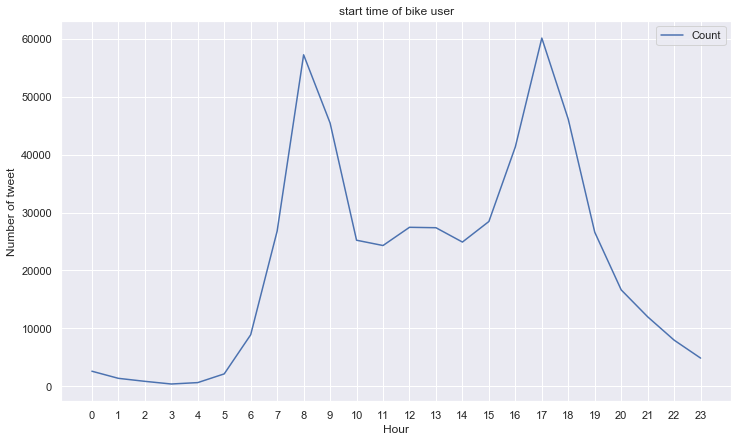

In [17]:
keys = [pair for pair, df in df2.groupby(['Hour'])]
plt.subplots(figsize=(12,7))
plt.plot(keys, df2.groupby(['Hour']).count()['Count'])
plt.xlabel('Hour')
plt.ylabel('Number of tweet')
plt.xticks(keys)
plt.title('start time of bike user')
plt.legend()
plt.show()

# 8am and 5pm are most pouplar time that people rent a bike.
# I guess people ride a bike to go to work and get back home.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In this part there were no outlier

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were not any unsual distributions in visualization.So it wasn't adjusted or reformed

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

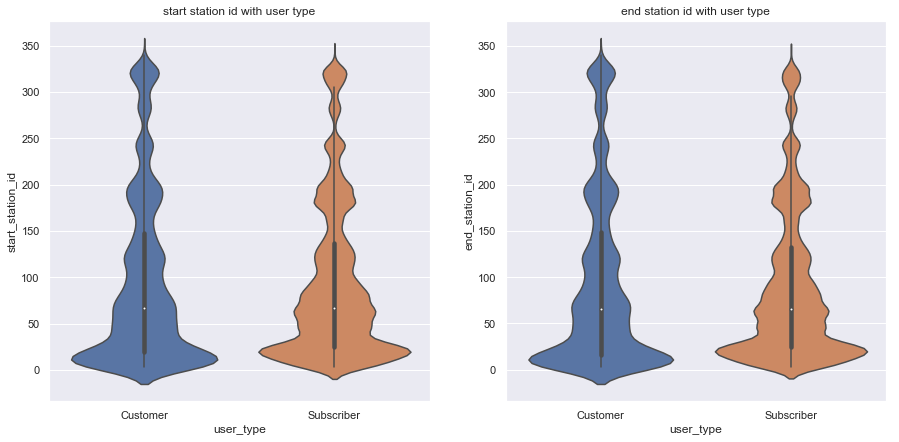

In [18]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.violinplot(data=df,x='user_type',y='start_station_id',ax=ax[0])
ax[0].set_title('start station id with user type')
sns.violinplot(data=df,x='user_type',y='end_station_id',ax=ax[1])
ax[1].set_title('end station id with user type')
plt.show()

# shows almost same plotting shape
# start & end station id with lower number are popular station that people visit
# We found that most of data are placed in start_station and end station interval from 0 to 50 

In [19]:
# heatmap for whole station id  
df.describe()

,duration_min,start_station_id,end_station_id,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000
mean,18.316825,95.034245,92.184041,1672.533079
std,57.402441,86.083078,84.969491,971.356959
min,1.016667,3.000000,3.000000,10.000000
25%,6.366667,24.000000,23.000000,787.000000
50%,9.933333,67.000000,66.000000,1728.500000
75%,15.633333,139.000000,134.000000,2520.000000
max,1439.483333,340.000000,340.000000,3733.000000


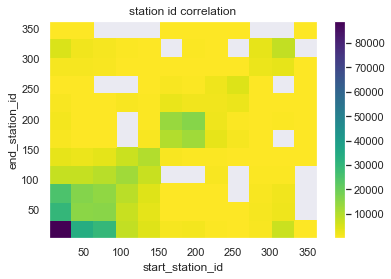

In [20]:
# heatmap for whole station id  
bin_x = np.arange(3,340+30,30)
bin_y = np.arange(3,340+30,30)

plt.hist2d(data=df,x='start_station_id',y='end_station_id',cmin=0.5,cmap='viridis_r',
           bins=[bin_x,bin_y]);
plt.colorbar()  # level of color in numeric value  
plt.xlabel('start_station_id')
plt.ylabel('end_station_id')
plt.title('station id correlation');

In [21]:
#From violinplot we found that most of station id come from unter "50"
#I queried station id unter 50 and figure out the distributinon with heatmap
#Before we depict it we have to decide the interval of heatmap , called "bin"
a=df[(df['start_station_id']<50) & (df['end_station_id']<50)]
a.describe()
sample = a.sample(1000)

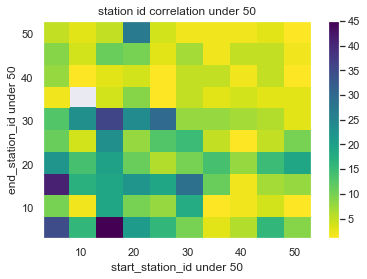

In [22]:
# heatmap
bin_x = np.arange(3,49+5,5)
bin_y = np.arange(3,49+5,5)

plt.hist2d(data=sample,x='start_station_id',y='end_station_id',cmin=0.5,cmap='viridis_r',
           bins=[bin_x,bin_y]);
plt.colorbar()  # level of color in numeric value  
plt.xlabel('start_station_id under 50')
plt.ylabel('end_station_id under 50')
plt.title('station id correlation under 50');

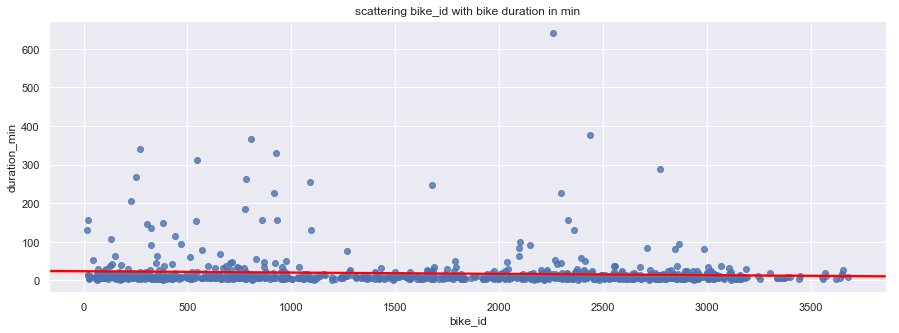

In [23]:
# Regplot : scatterplor + regression 
# I'll use 'a' for scatterplot.Scattering with df would be messy because it's huge.You will get a lot of outlier on the graph. 
plt.subplots(figsize=(15,5))
sns.regplot(data=sample,x='bike_id',y='duration_min',x_jitter=0.04,fit_reg=True,line_kws={'color':'red'});
plt.title('scattering bike_id with bike duration in min');

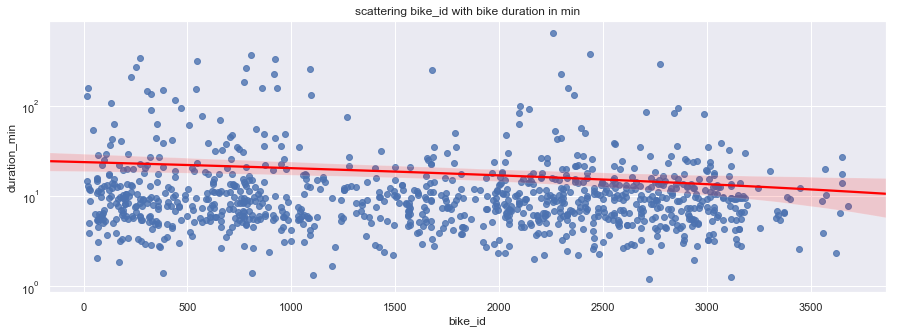

In [24]:
# Regplot : scatterplor + regression 
# use log fuction to change the y-axis 
plt.subplots(figsize=(15,5))
ax=sns.regplot(data=sample,x='bike_id',y='duration_min',x_jitter=0.04,fit_reg=True,line_kws={'color':'red'});
plt.title('scattering bike_id with bike duration in min');
ax.set_yscale('log')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The duration of using bike shows very simlar shape.They rent a bike under 100min. Of course there are a lot of outlier. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> if start_station_id is equal to end station_id people visit mostly lower station id(under 50).

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [25]:
user_type=sample['user_type']

In [26]:
user_type.value_counts()

Subscriber    761
Customer      239
Name: user_type, dtype: int64

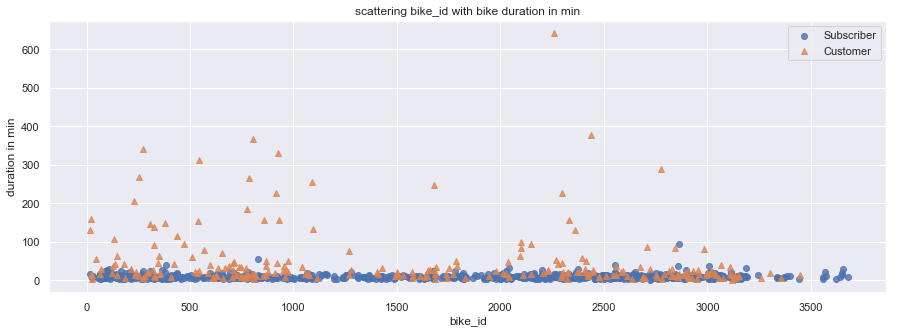

In [27]:
# Regplot with shape variation 
plt.subplots(figsize=(15,5))
type_marker =[['Subscriber','o'],['Customer','^']]


for ttype,marker in type_marker:
    plot_data = sample.loc[user_type==ttype]
    ax=sns.regplot(data=plot_data,x='bike_id',y='duration_min',x_jitter=0.04,marker=marker,fit_reg=False);

    
plt.xlabel('bike_id');
plt.ylabel('duration in min');
plt.title('scattering bike_id with bike duration in min');
plt.legend(['Subscriber','Customer']);

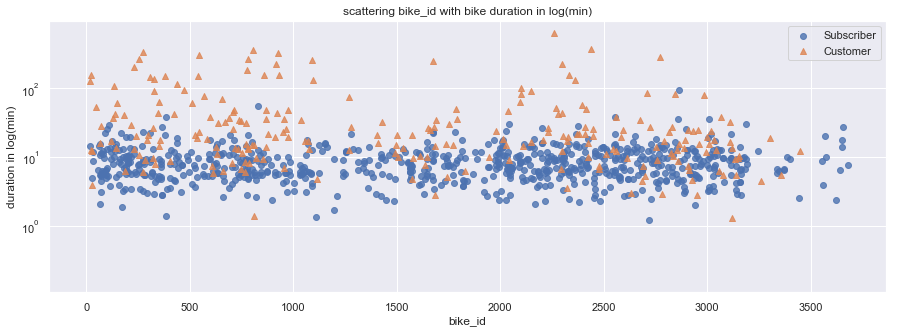

In [28]:
#scatterplot with shape variation 
# use log fuction to change the y-axis 
# Regplot with shape
plt.subplots(figsize=(15,5))
type_marker =[['Subscriber','o'],['Customer','^']]


for ttype,marker in type_marker:
    plot_data = sample.loc[user_type==ttype]
    ax=sns.regplot(data=plot_data,x='bike_id',y='duration_min',x_jitter=0.04,marker=marker,fit_reg=False);

    
plt.xlabel('bike_id');
plt.ylabel('duration in log(min)');
plt.title('scattering bike_id with bike duration in log(min)');
plt.legend(['Subscriber','Customer'])
ax.set_yscale('log')

In [33]:
df3=df.sample(1000)
df3=df3.reset_index()
# copy df in order to keep original dataset

In [35]:
df3.head()

,index,duration_min,start_time,end_time,start_station_id,end_station_id,bike_id,user_type
0,226866,6.683333,2017-10-19 12:25:13.5070,2017-10-19 12:31:55.4570,160,218,3132,Customer
1,181056,7.600000,2017-11-01 09:14:54.2420,2017-11-01 09:22:30.9510,5,80,2441,Subscriber
2,259331,7.933333,2017-10-10 07:46:32.2060,2017-10-10 07:54:28.2350,22,50,65,Subscriber
3,404419,6.966667,2017-08-27 14:58:17.8700,2017-08-27 15:05:16.1510,176,210,482,Customer
4,185836,5.516667,2017-10-31 08:19:30.9900,2017-10-31 08:25:02.7660,179,182,2182,Subscriber


In [36]:
# start_station_id categorize
list = []
for i in np.arange(0,df3.shape[0],1) : 
    if df3['start_station_id'][i] <=100:
        df3['start_station_id'][i] ='low'
        list.append(df3['start_station_id'][i])
    elif 100< df3['start_station_id'][i] <=200:
        df3['start_station_id'][i] ='middle'
        list.append(df3['start_station_id'][i])
    elif 200<df3['start_station_id'][i] <=300:
        df3['start_station_id'][i] ='high'
        list.append(df3['start_station_id'][i])    
    else :
        df3['start_station_id'][i] ='extrem high'
        list.append(df3['start_station_id'][i])        
        
        
# end_station_id categorize
list2 = []
for i in np.arange(0,df3.shape[0],1) : 
    if df3['end_station_id'][i] <=100:
        df3['end_station_id'][i] ='low'
        list2.append(df3['end_station_id'][i])
    elif 100< df3['end_station_id'][i] <=200:
        df3['end_station_id'][i] ='middle'
        list2.append(df3['end_station_id'][i])
    elif 200<df3['end_station_id'][i] <=300:
        df3['end_station_id'][i] ='high'
        list2.append(df3['end_station_id'][i])    
    else :
        df3['end_station_id'][i] ='extrem high'
        list2.append(df3['end_station_id'][i])     

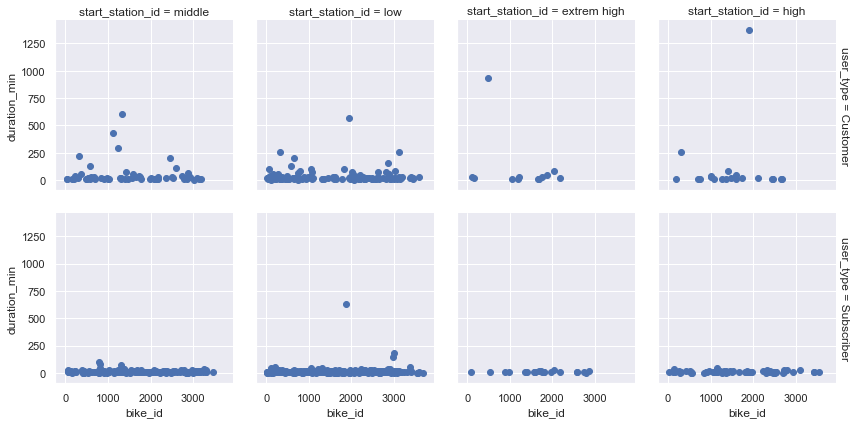

In [40]:
#Faceting : start_station_id,user_type,bike_id,duration_min
g = sns.FacetGrid(data=df3,col='start_station_id',row='user_type',margin_titles=True)
ax=g.map(plt.scatter,'bike_id','duration_min')

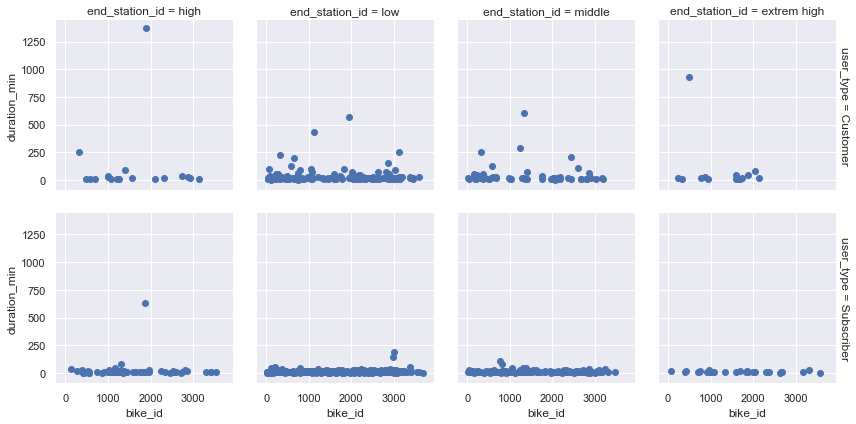

In [47]:
#Faceting : end_station_id,user_type,bike_id,duration_min
base_color = sns.color_palette()[6]
g = sns.FacetGrid(data=df3,col='end_station_id',row='user_type',margin_titles=True)
ax=g.map(plt.scatter,'bike_id','duration_min')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Facetgrid you can find that in row of **Subscriber** the plotting makes a one line.That menas there is little to no outlier in the graph.But in row of **Customer** shows that there are a lot of outlier ouf of plotting line 

### Were there any interesting or surprising interactions between features?

> Categorizing station_id shows similar plotting result. As you can see 2 facetgrid it's doesn't matter which station id they visit for start or end duration times and bike_id are mostly similar.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!